In [27]:
import json

import matplotlib.pyplot as plt
import numpy as np

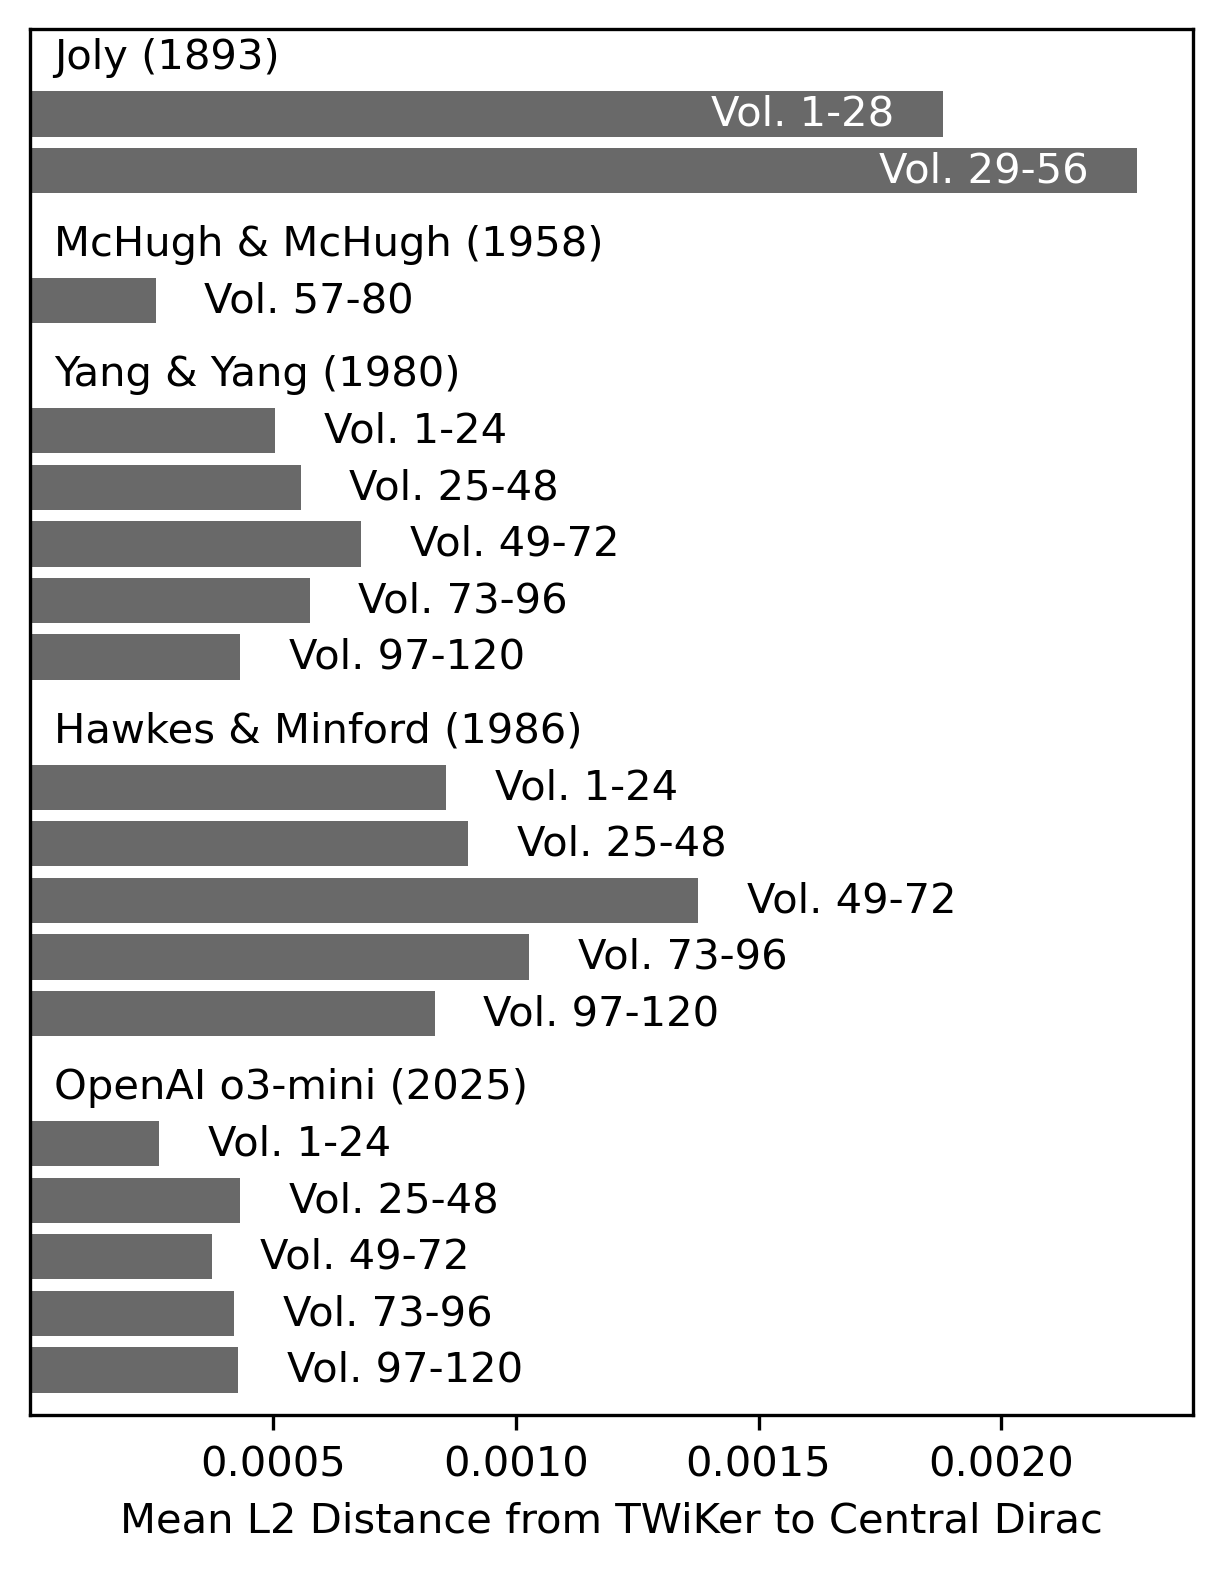

In [28]:
# Book dictionary
books = {
    "stone_B1_28": "Joly (1893); Vol. 1-28",
    "stone_B29_56": "Joly (1893); Vol. 29-56",
    "stone_F57_80": "McHugh & McHugh (1958); Vol. 57-80",
    "stone_Y1_24": "Yang & Yang (1980); Vol. 1-24",
    "stone_Y25_48": "Yang & Yang (1980); Vol. 25-48",
    "stone_Y49_72": "Yang & Yang (1980); Vol. 49-72",
    "stone_Y73_96": "Yang & Yang (1980); Vol. 73-96",
    "stone_Y97_120": "Yang & Yang (1980); Vol. 97-120",
    "stone_H1_24": "Hawkes & Minford (1986); Vol. 1-24",
    "stone_H25_48": "Hawkes & Minford (1986); Vol. 25-48",
    "stone_H49_72": "Hawkes & Minford (1986); Vol. 49-72",
    "stone_H73_96": "Hawkes & Minford (1986); Vol. 73-96",
    "stone_H97_120": "Hawkes & Minford (1986); Vol. 97-120",
    "stone_G1_24": "OpenAI o3-mini, 2025; Vol. 1-24",
    "stone_G25_48": "OpenAI o3-mini, 2025; Vol. 25-48",
    "stone_G49_72": "OpenAI o3-mini, 2025; Vol. 49-72",
    "stone_G73_96": "OpenAI o3-mini, 2025; Vol. 73-96",
    "stone_G97_120": "OpenAI o3-mini, 2025; Vol. 97-120",
}

# Load JSON data
pos_dist_dict_book = {}
for book in books:
    with open(f"results/distance/{book}.json", "r") as file:
        pos_dist_dict_book[book] = json.load(file)

# Define groups
groups = [
    ["stone_B1_28", "stone_B29_56"],
    ["stone_F57_80"],
    ["stone_Y1_24", "stone_Y25_48", "stone_Y49_72", "stone_Y73_96", "stone_Y97_120"],
    ["stone_H1_24", "stone_H25_48", "stone_H49_72", "stone_H73_96", "stone_H97_120"],
    ["stone_G1_24", "stone_G25_48", "stone_G49_72", "stone_G73_96", "stone_G97_120"],
]

# Flatten for ordering
ordered_keys = [key for group in groups for key in group]
ordered_labels = [books[key] for key in ordered_keys]
ordered_values = [pos_dist_dict_book[key]["all"] for key in ordered_keys]

# Add spacing between groups
spaced_labels = []
spaced_values = []
group_spacer = 1.3  # Space between groups

pos = 0  # Current position
positions = []
positions_group = [-group_spacer]

for group in groups:
    for key in group:
        spaced_labels.append(books[key])
        spaced_values.append(pos_dist_dict_book[key]["all"])
        positions.append(pos)
        pos += 1  # Normal increment
    positions_group.append(pos)
    pos += group_spacer  # Add spacing after each group

# Plot
plt.figure(dpi=300, figsize=(5, 6))
plt.barh(positions, spaced_values, align="center", color="dimgray")
for pos, lab, val in zip(positions, spaced_labels, spaced_values):
    if "Joly" in lab:
        plt.text(val - 0.0001, pos, lab.split("; ")[1], ha="right", va="center", fontsize=10, color="white")
    else:
        plt.text(val + 0.0001, pos, lab.split("; ")[1], ha="left", va="center", fontsize=10)
for pos, lab in zip(positions_group[:-1], ["Joly (1893)",
                                           "McHugh & McHugh (1958)",
                                           "Yang & Yang (1980)",
                                           "Hawkes & Minford (1986)",
                                           "OpenAI o3-mini (2025)"]):
    plt.text(0.00005, pos + 0.3, lab, ha="left", va="center", fontsize=10)
plt.xticks(np.arange(0.0005, 0.002001, 0.0005))
plt.xlabel("Mean L2 Distance from TWiKer to Central Dirac")
plt.ylim(-1.5, 23)
plt.gca().invert_yaxis()
plt.yticks([])
plt.savefig("results/figs/hlm_scalar.pdf", bbox_inches="tight", pad_inches=0.05)
plt.show()

In [29]:
classes = {
    "intj": "Interjection (Wow, Ha)",
    "propn": "Proper Noun (Harry, UK)",
    "noun": "Noun (apple, car)",
    "verb": "Verb (run, eat)",
    "adj": "Adjective (happy, tall)",
    "adv": "Adverb (quickly, softly)",
    "sconj": "Subord. Conj. (if, as)",
    "aux": "Auxiliary Verb (is, has)",
    "prop": "Preposition (in, of)",
    "pron": "Pronoun (she, they)",
    "cconj": "Coord. Conj. (and, or)",
    "det": "Determiner (the, an)"
}

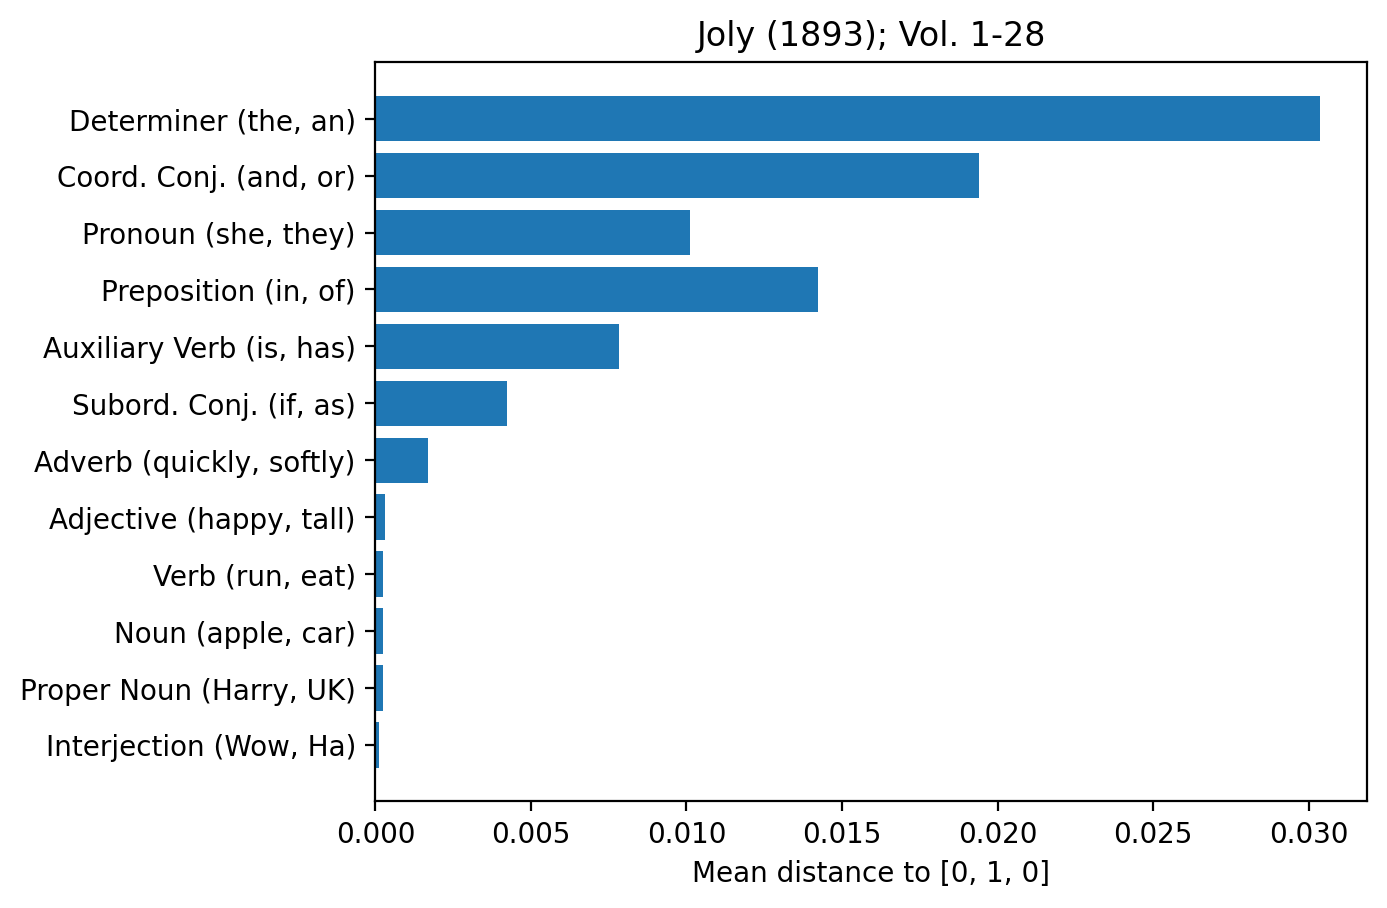

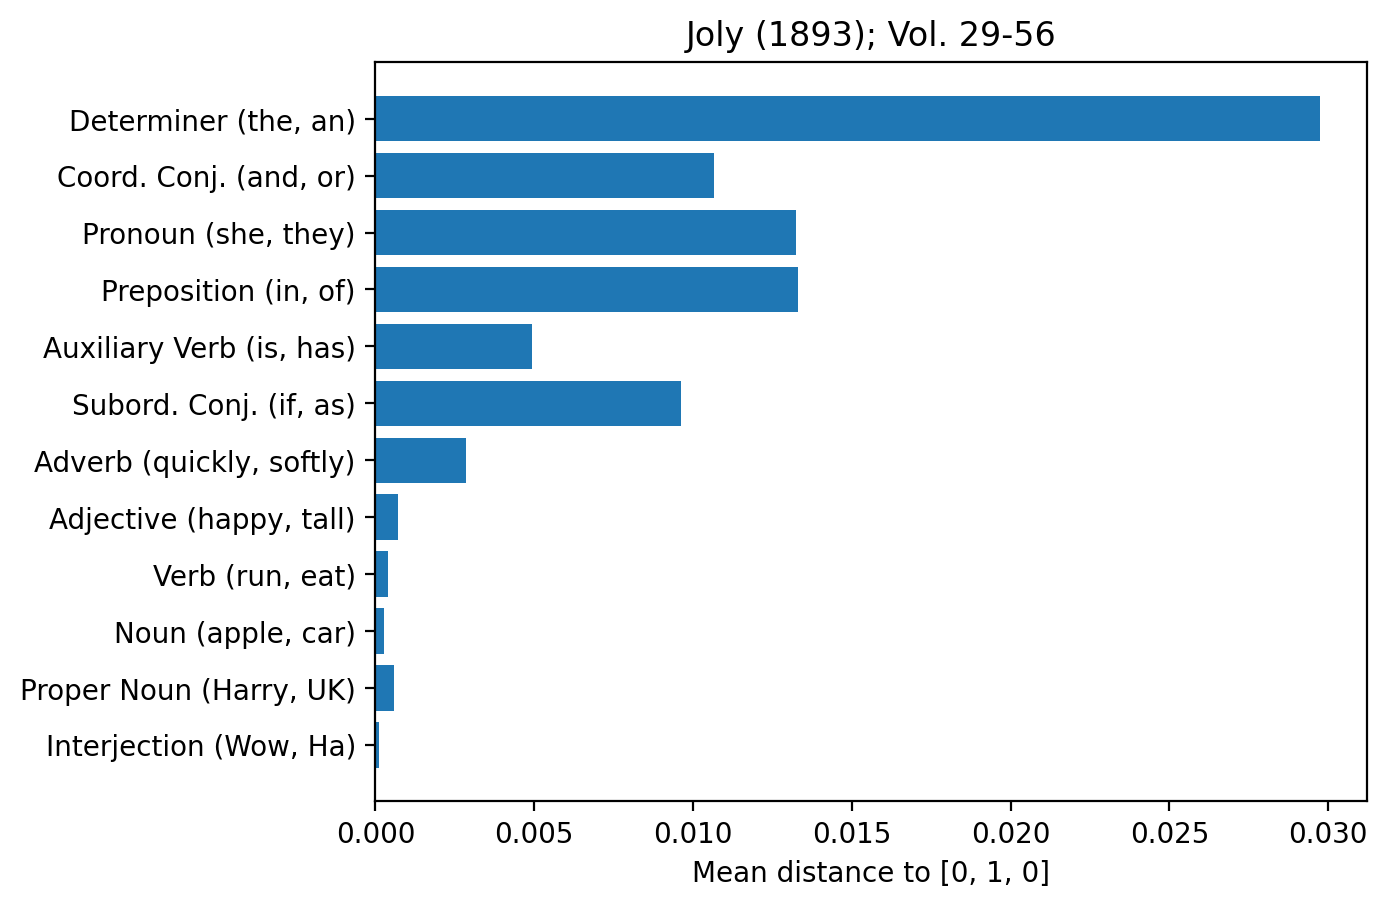

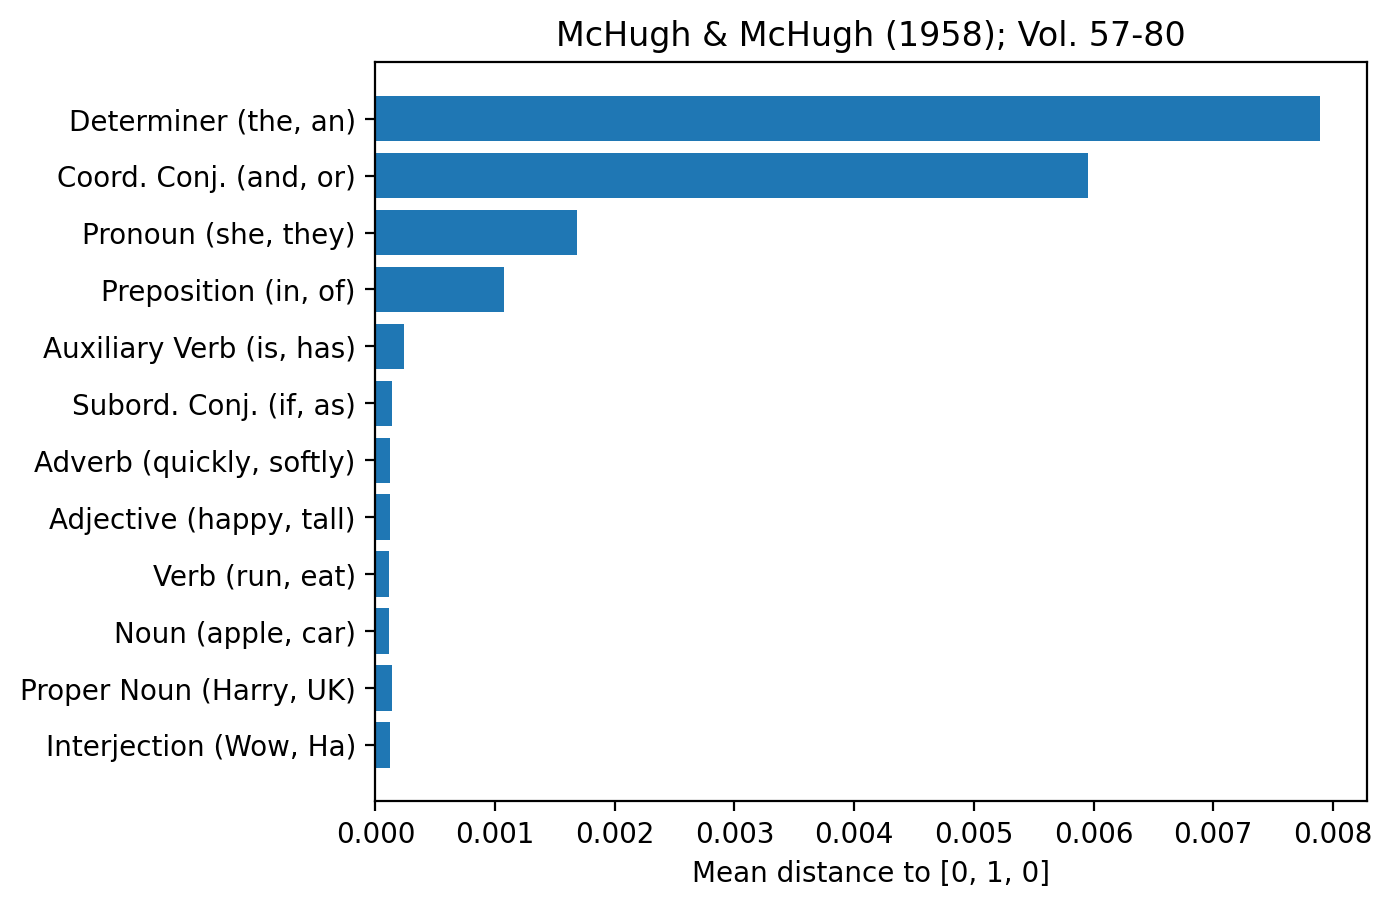

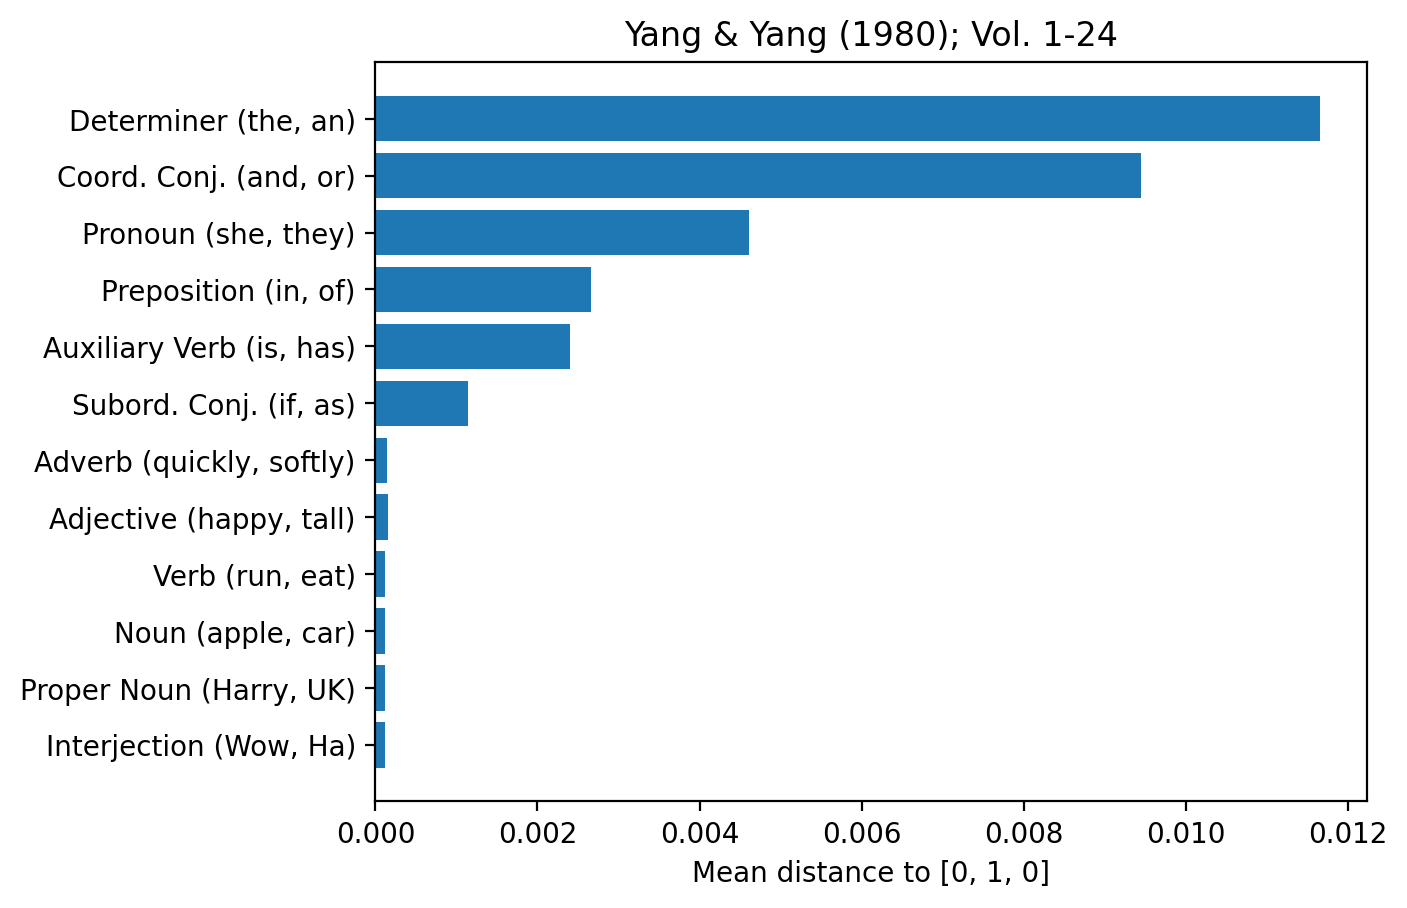

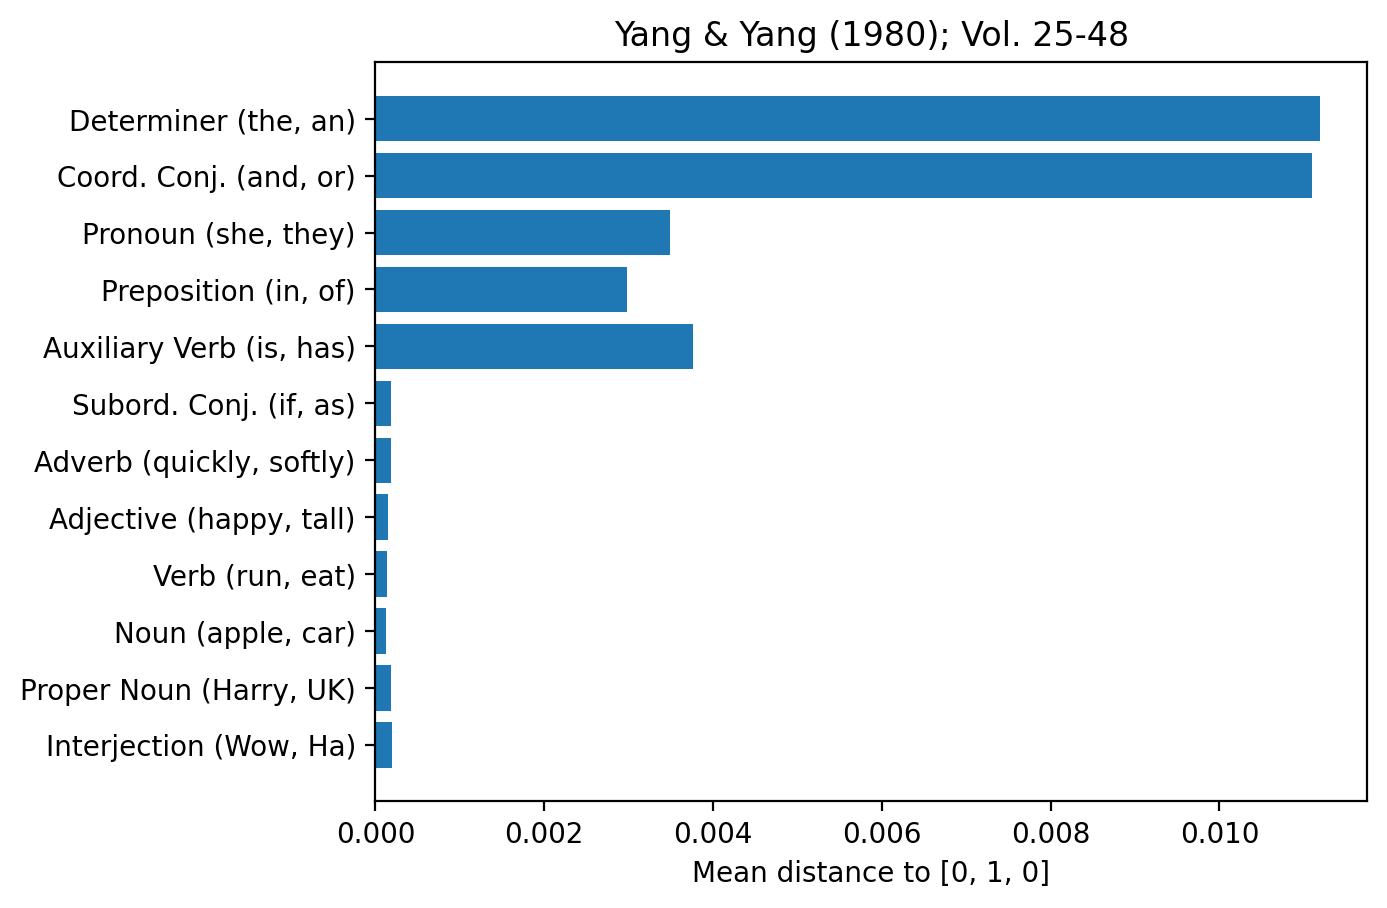

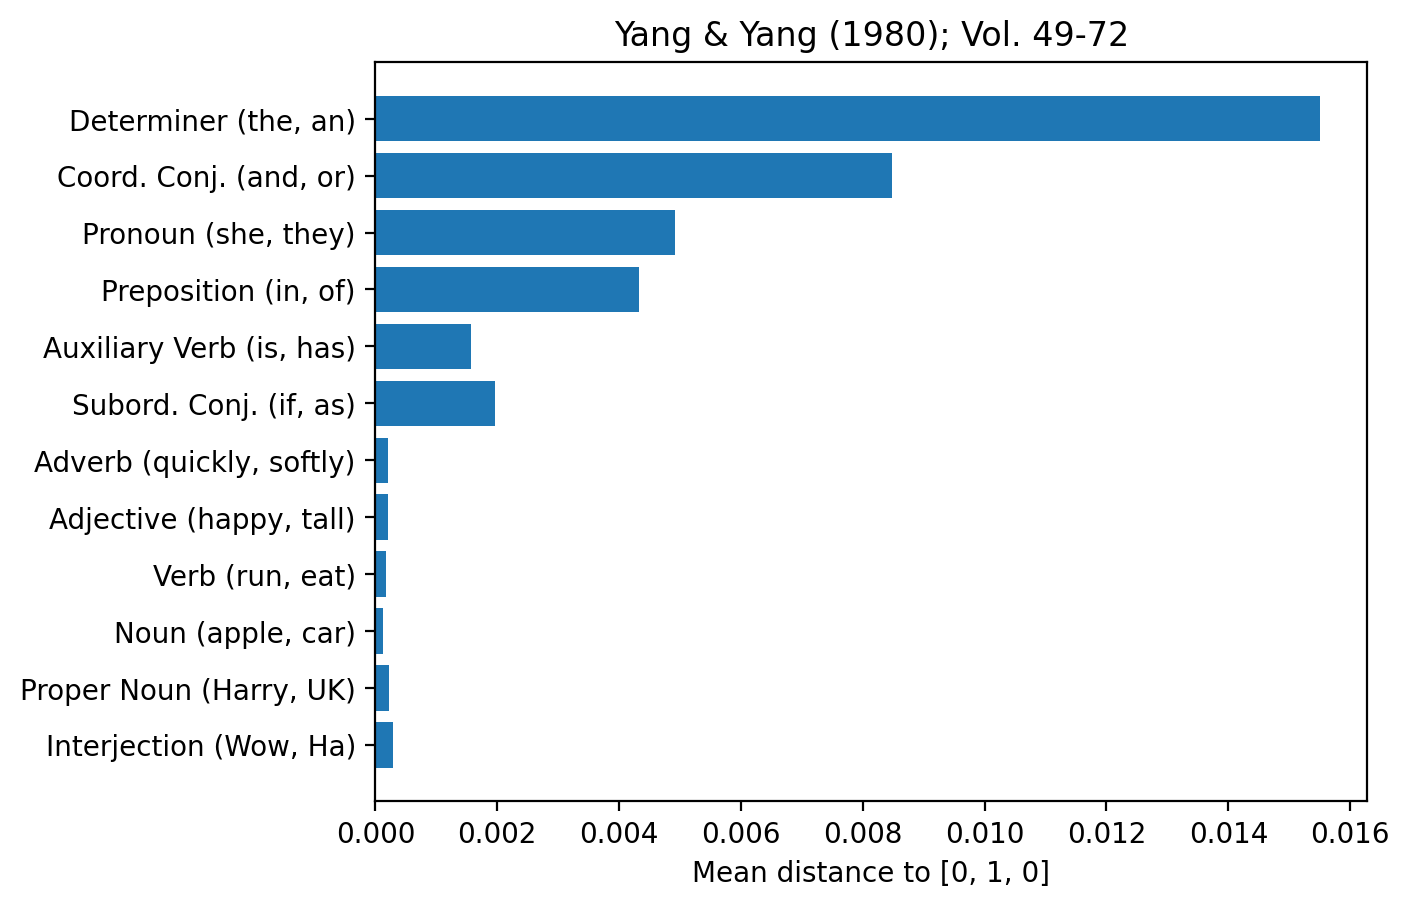

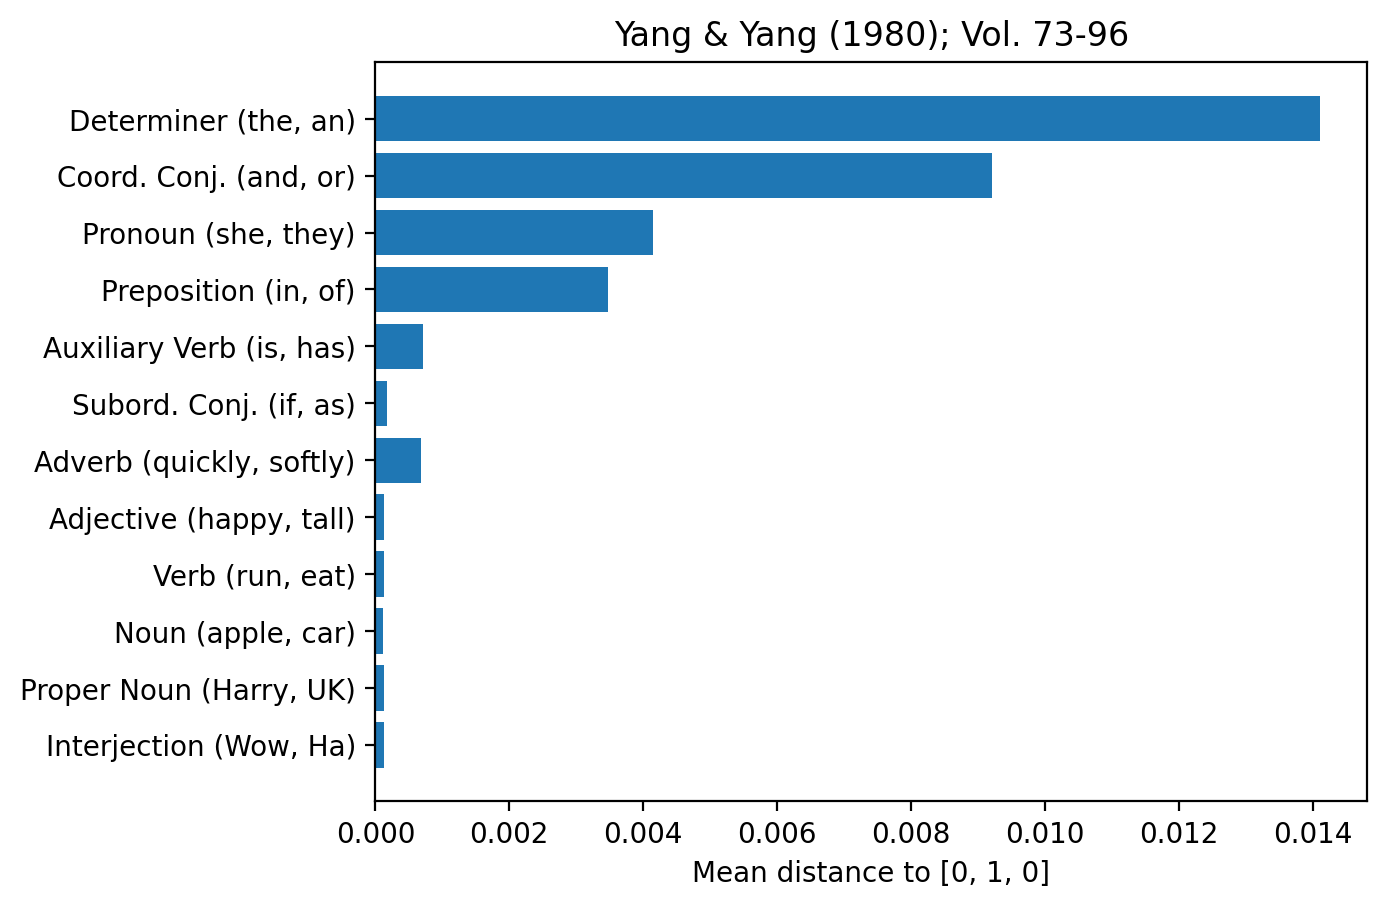

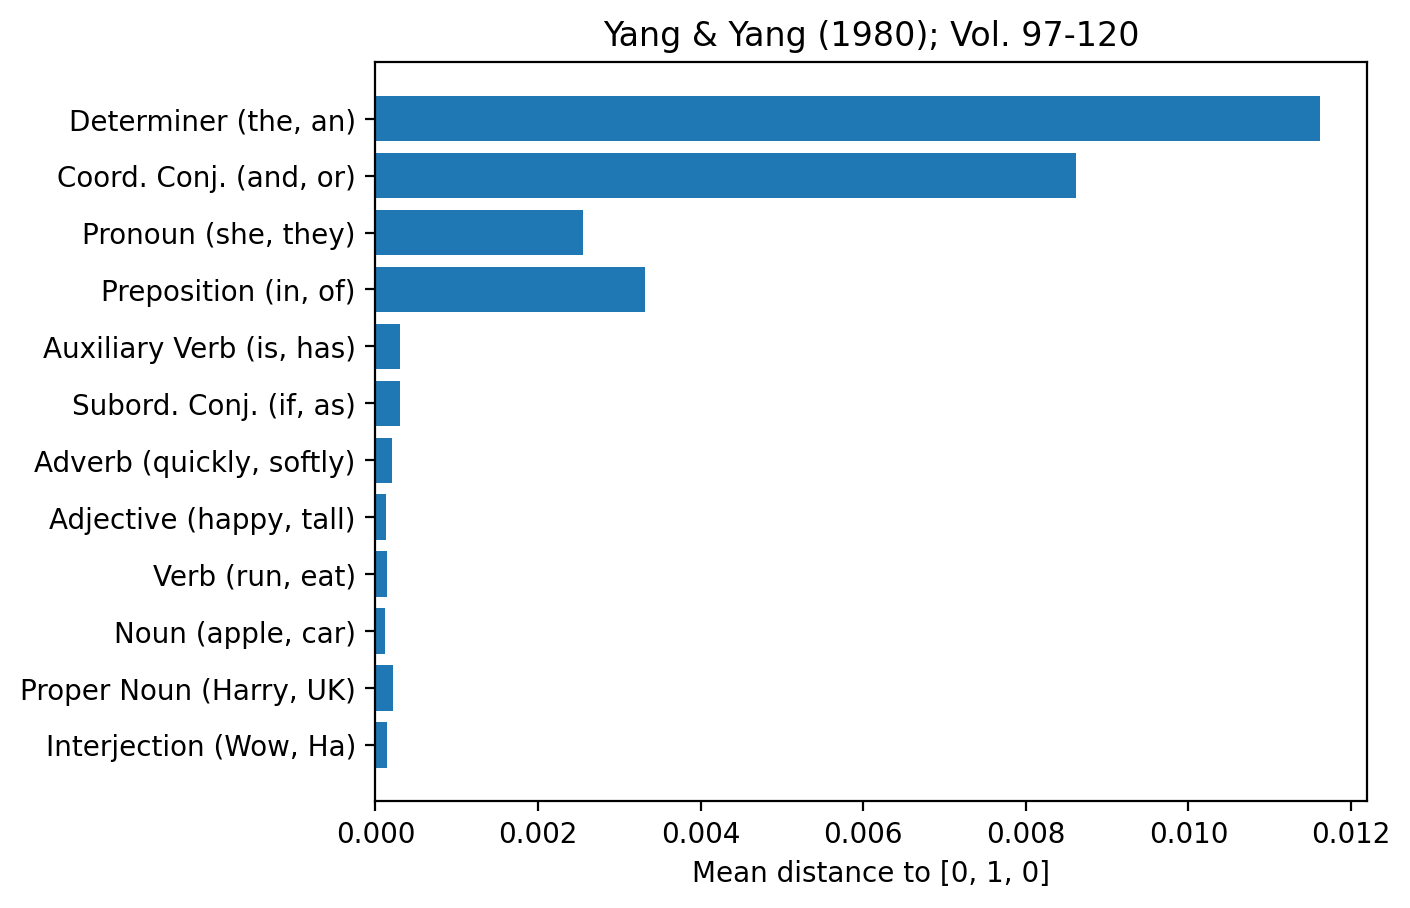

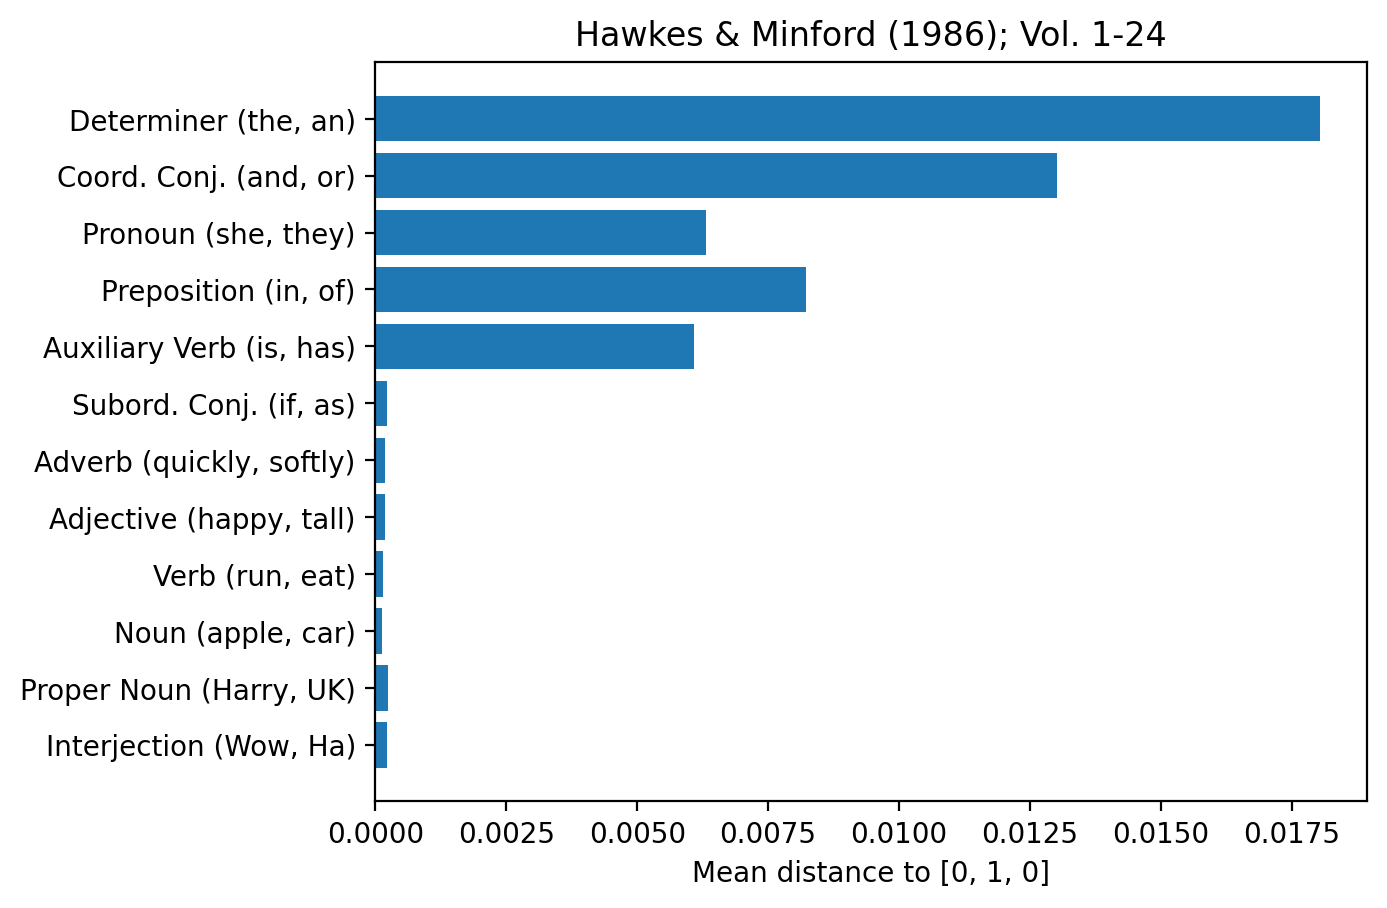

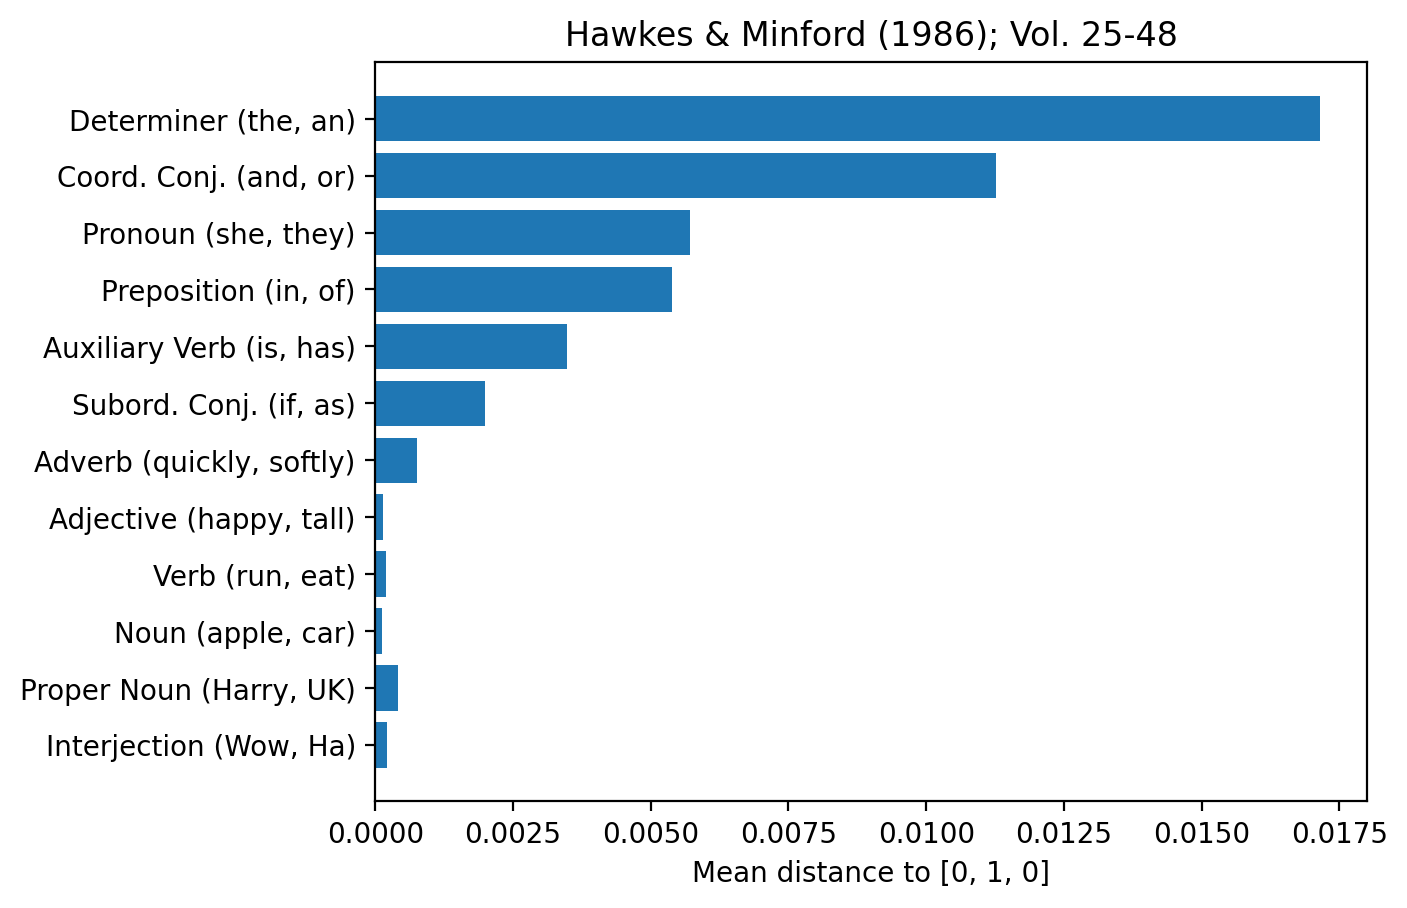

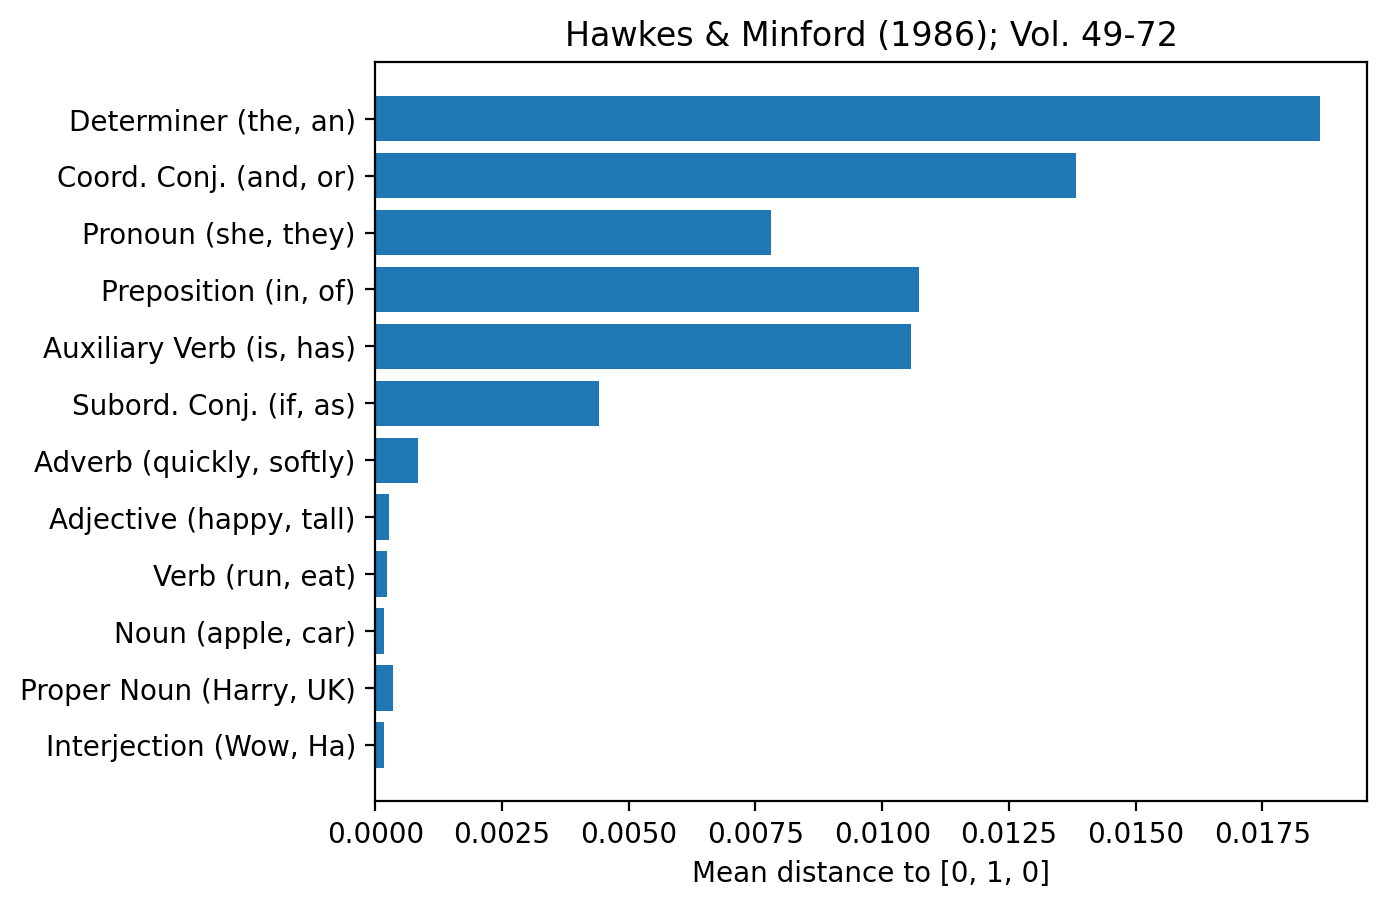

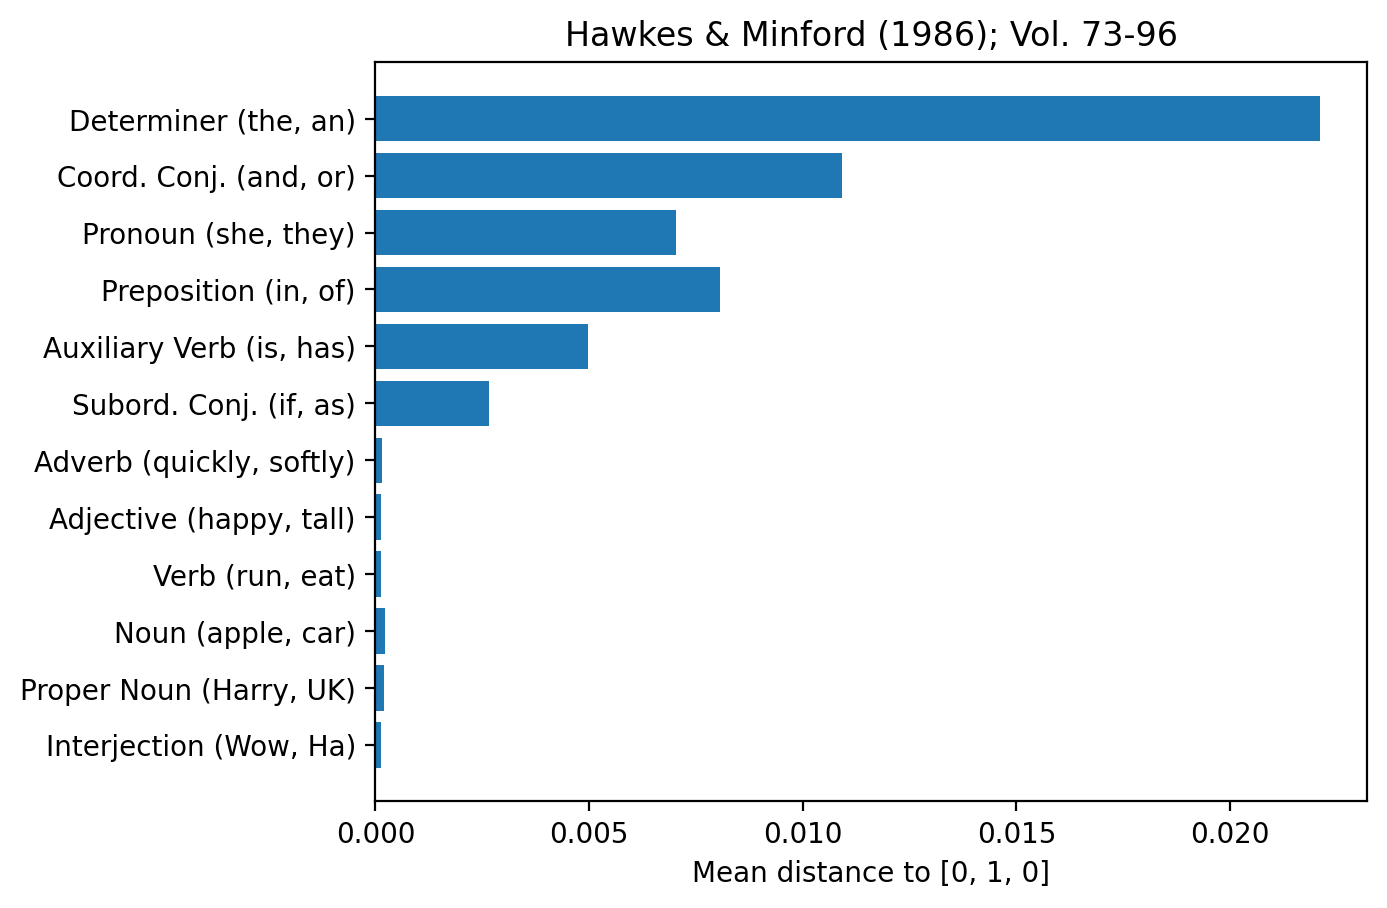

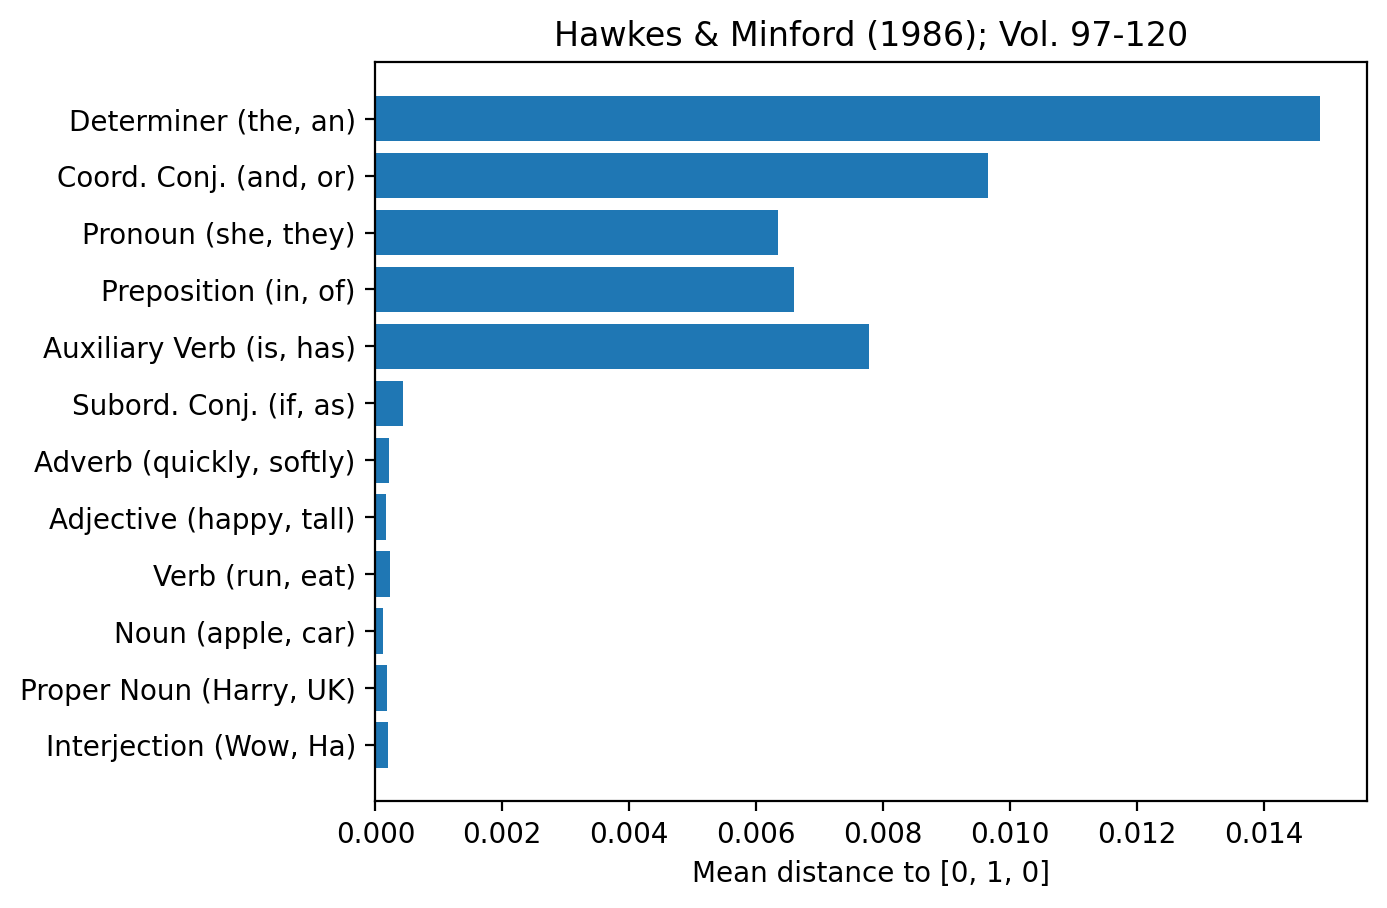

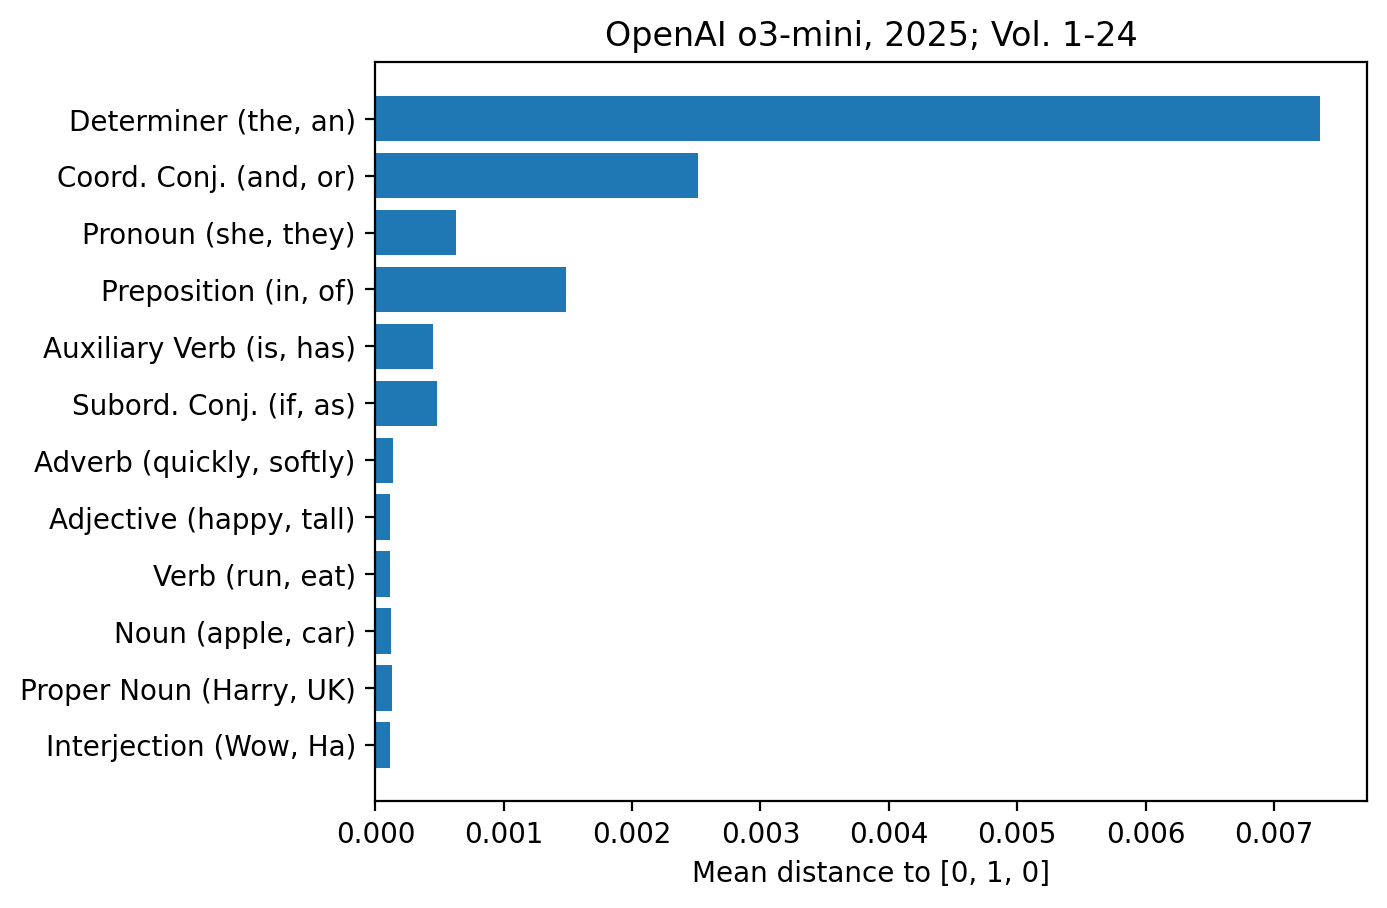

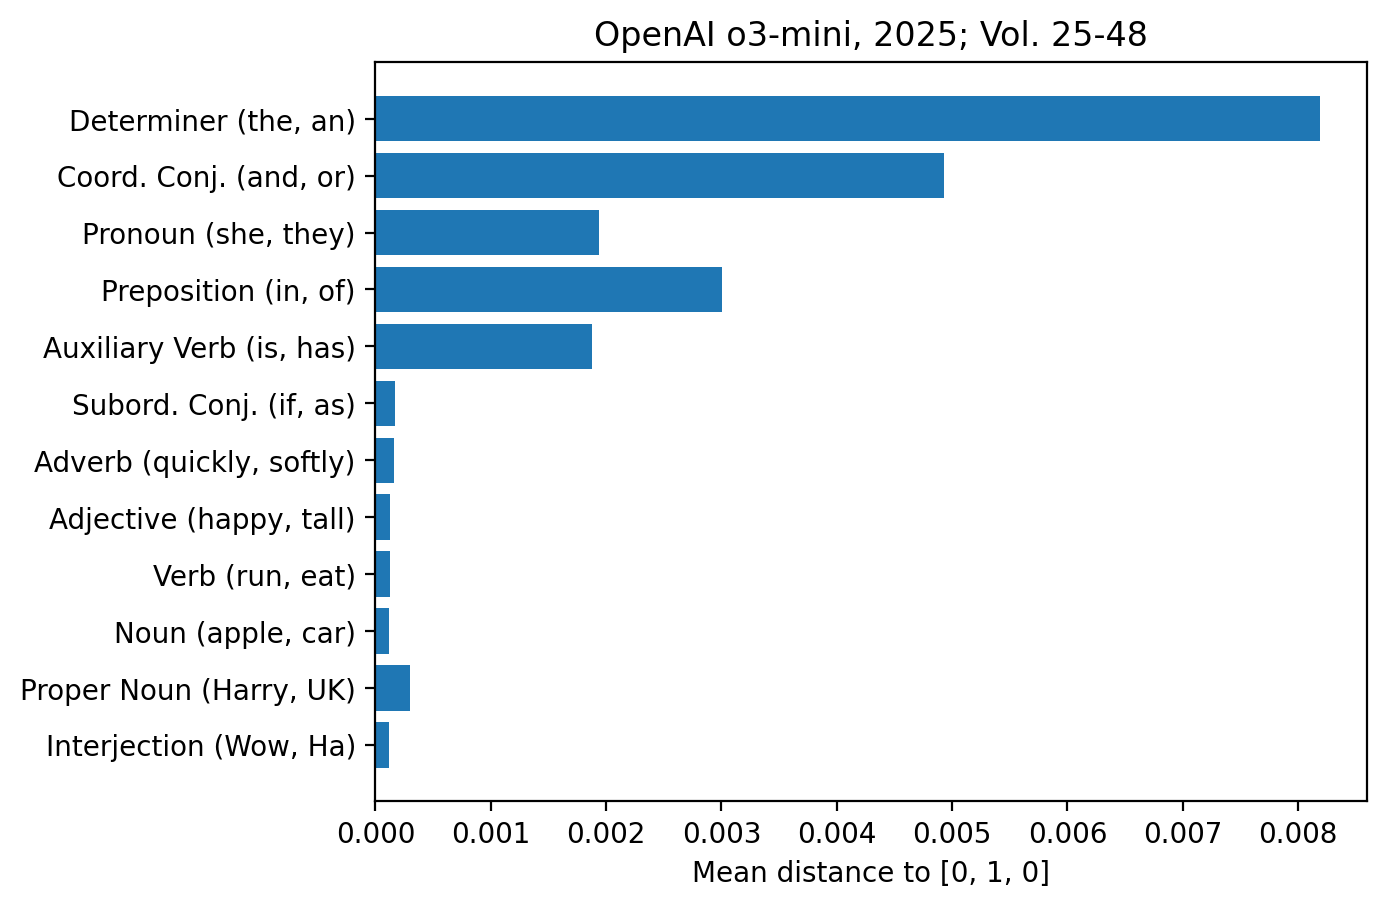

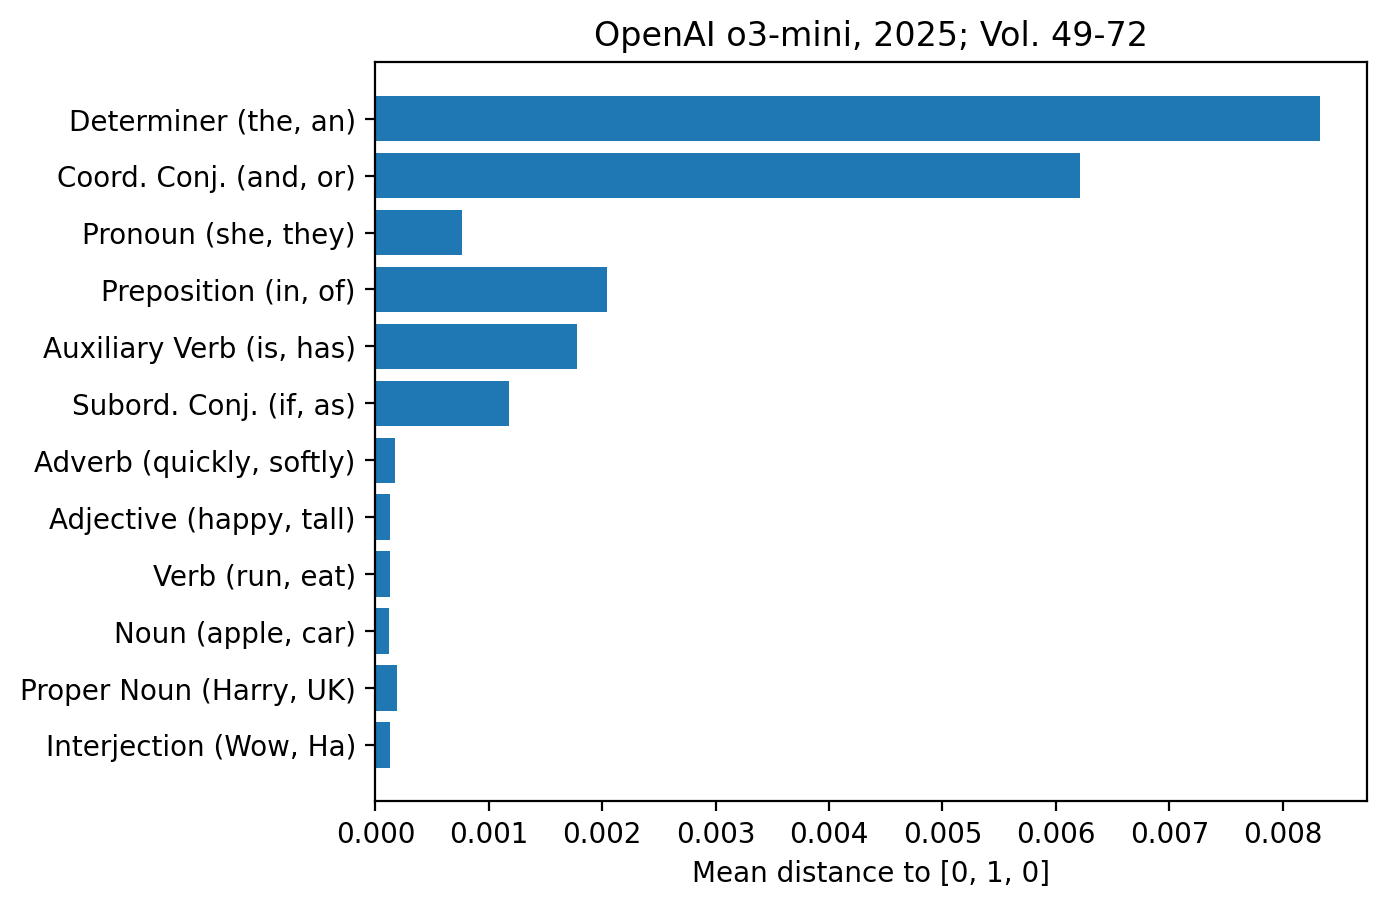

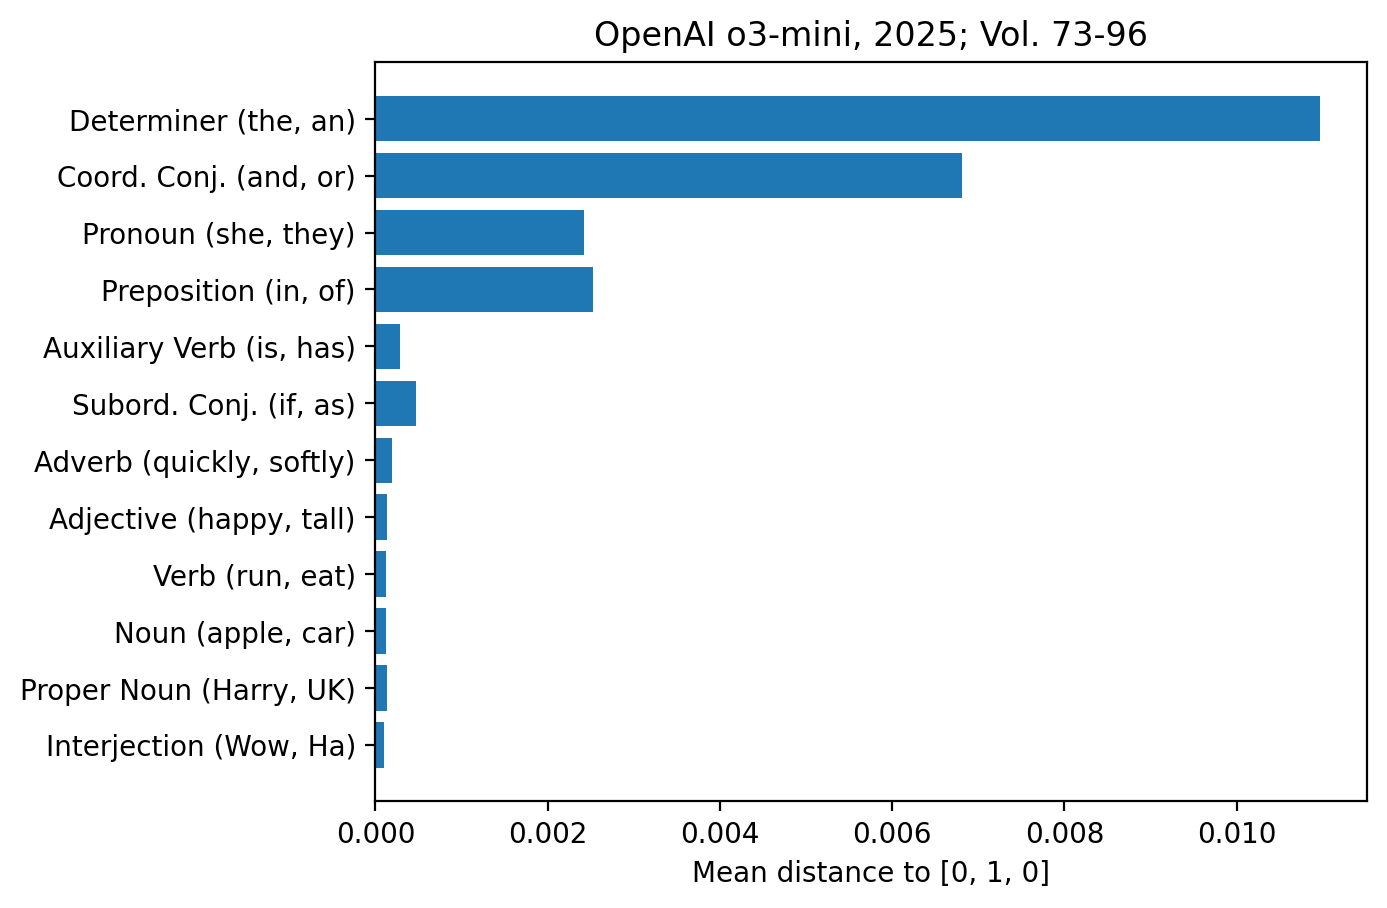

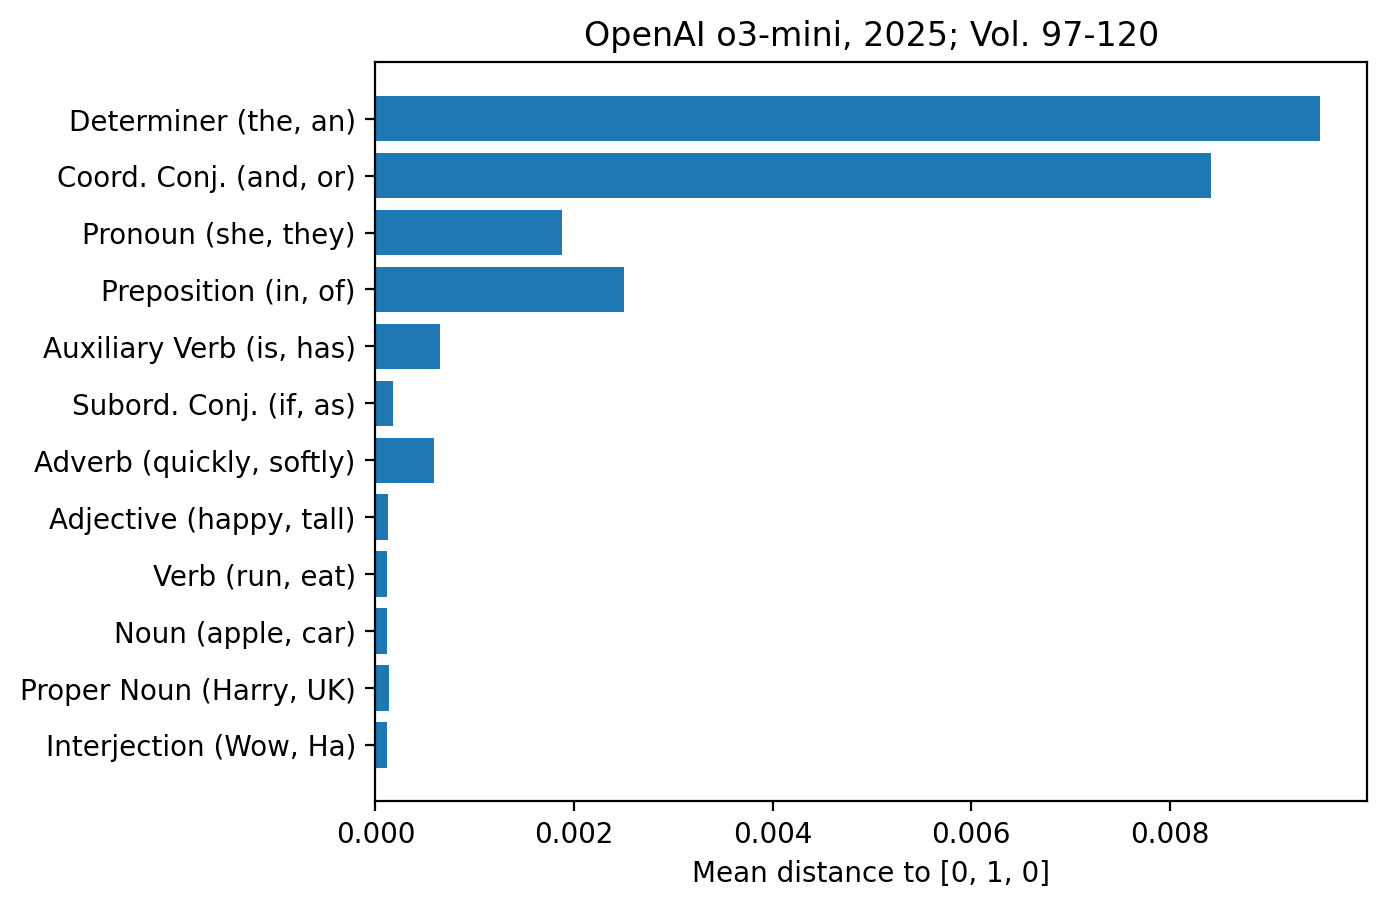

In [30]:
for book in books:
    plt.figure(dpi=200)
    plt.barh(classes.values(), [pos_dist_dict_book[book][k] for k in classes.keys()])
    plt.title(books[book])
    plt.xlabel("Mean distance to [0, 1, 0]")
    plt.savefig(f"results/figs/hongloumeng/{book}.pdf", bbox_inches="tight", pad_inches=0.05)
    # plt.show()

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.manifold import TSNE

In [32]:
X = np.array([[pos_dist_dict_book[book][k] for k in classes.keys()] for book in books])
label_true = np.array([0, 0,
                       1,
                       2, 2, 2, 2, 2,
                       3, 3, 3, 3, 3,
                       4, 4, 4, 4, 4])

# Initialize and fit KMeans
labels_pred = []
scores = []
for i in range(100):
    model = KMeans(n_clusters=5,
                   init='k-means++',
                   random_state=i)
    model.fit(X)
    labels_pred.append(model.labels_)
    scores.append(v_measure_score(label_true, model.labels_))
scores = np.array(scores)

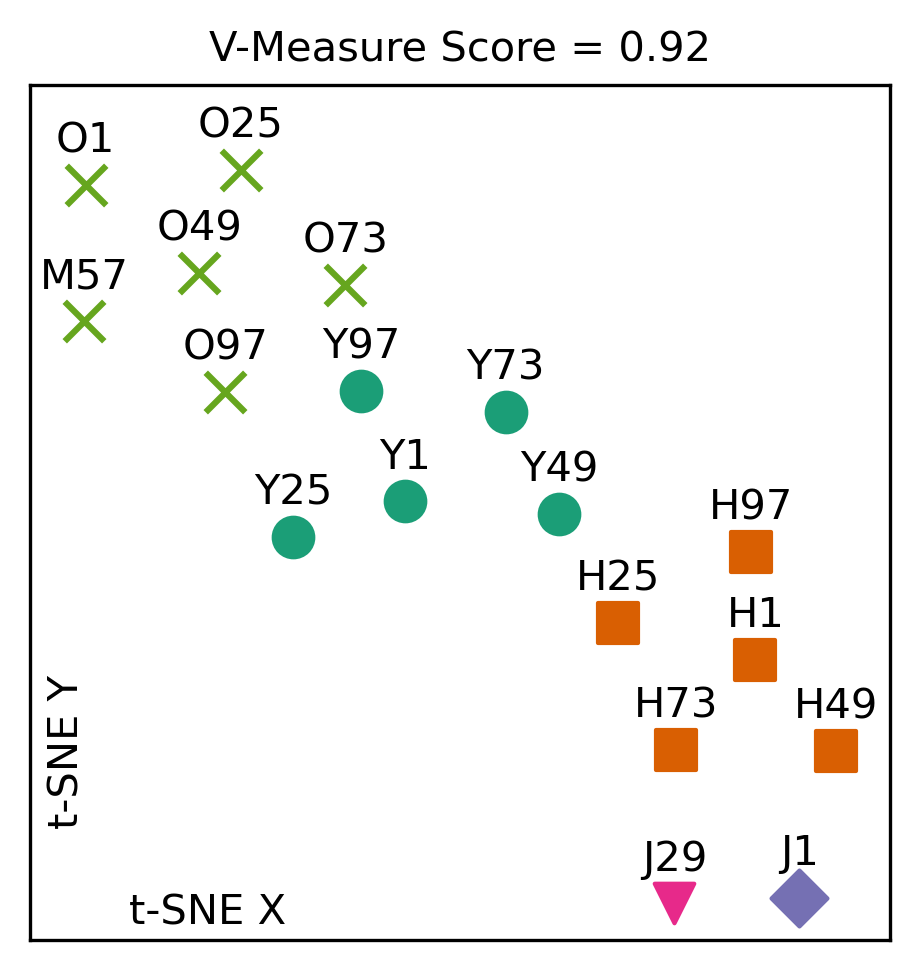

In [33]:
# Show best
labels_pred_show = labels_pred[np.argmax(scores)]

# Make sure GPT is last
gpt_label = labels_pred_show[-1]
labels_pred_show_copy = labels_pred_show.copy()
labels_pred_show[labels_pred_show_copy == gpt_label] = 4
labels_pred_show[labels_pred_show_copy == 4] = gpt_label

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=9)  # Perplexity adjusted for small dataset
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization with KMeans labels
plt.figure(dpi=300, figsize=(3.7, 3.7))
shapes = ['o', 's', 'D', 'v', 'x', "p", "P"]
for i, label in enumerate(labels_pred_show):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=[plt.cm.Dark2(label)],
                s=90, marker=shapes[label])
    plt.text(X_tsne[i, 0], X_tsne[i, 1] + 4,
             list(books.keys())[i][6:].split("_")[0].replace("F", "M").replace("G", "O").replace("B", "J"),
             ha="center", va="bottom", fontsize=10)

ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.set_xlim(x_min - 0.02 * (x_max - x_min), x_max + 0.02 * (x_max - x_min))
ax.set_ylim(y_min, y_max + 0.06 * (y_max - y_min))
plt.text(x_min + 0.1 * (x_max - x_min), y_min + 0.02 * (y_max - y_min), "t-SNE X", fontsize=10)
plt.text(x_min + 0.05 * (x_max - x_min), y_min + 0.15 * (y_max - y_min), "t-SNE Y", fontsize=10,
         rotation=90, ha="right")
plt.xticks([])
plt.yticks([])

plt.title(f"V-Measure Score = {max(scores):.2f}", fontsize=10)
plt.savefig(f"results/figs/kmeans_twiker_all.pdf", bbox_inches="tight", pad_inches=0.02)

In [34]:
X = np.array([[pos_dist_dict_book[book][k] for k in classes.keys()]
              for book in books if "G" not in book])
label_true = np.array([0, 0,
                       1,
                       2, 2, 2, 2, 2,
                       3, 3, 3, 3, 3])

# Initialize and fit KMeans
labels_pred = []
scores = []
for i in range(100):
    model = KMeans(n_clusters=4,
                   init='k-means++',
                   random_state=i)
    model.fit(X)
    labels_pred.append(model.labels_)
    scores.append(v_measure_score(label_true, model.labels_))
scores = np.array(scores)

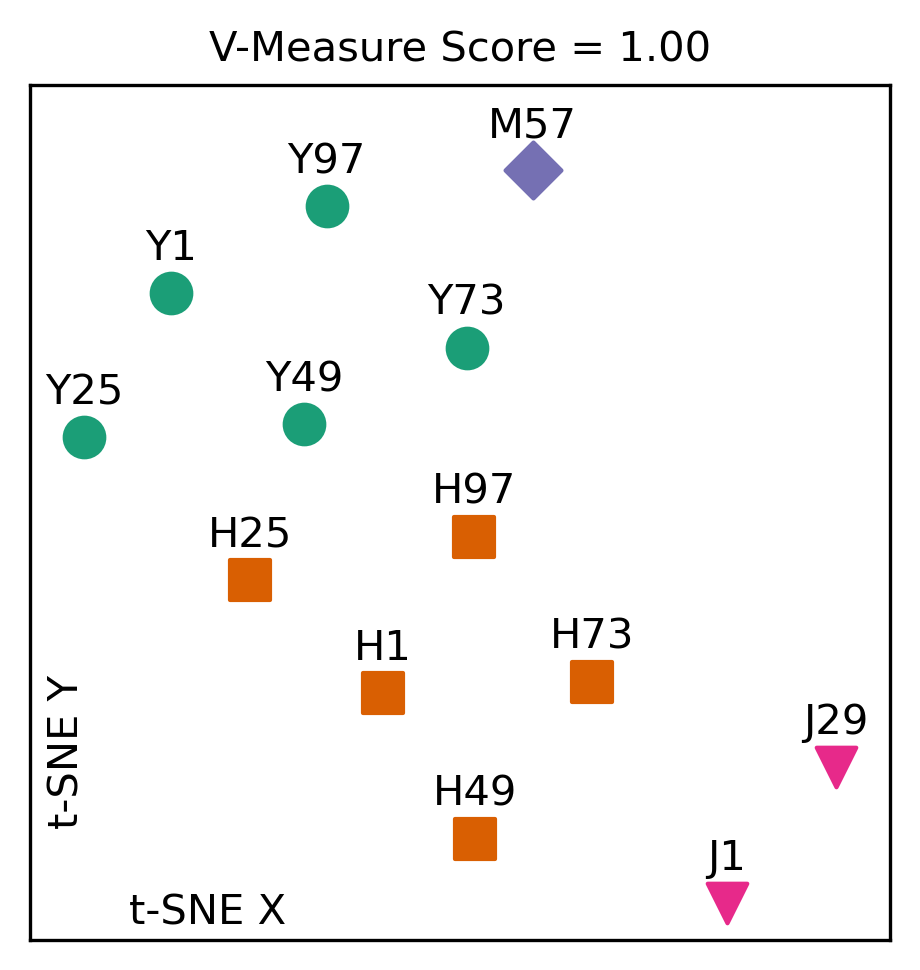

In [35]:
# Show best
labels_pred_show = labels_pred[np.argmax(scores)]
m_label = labels_pred_show[2]
labels_pred_show_copy = labels_pred_show.copy()
labels_pred_show[labels_pred_show_copy == m_label] = 2
labels_pred_show[labels_pred_show_copy == 2] = m_label

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=9)  # Perplexity adjusted for small dataset
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization with KMeans labels
plt.figure(dpi=300, figsize=(3.7, 3.7))
shapes = ['o', 's', 'D', 'v', 'x', "p", "P"]
for i, label in enumerate(labels_pred_show):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=[plt.cm.Dark2(label)],
                s=90, marker=shapes[label])
    plt.text(X_tsne[i, 0], X_tsne[i, 1] + 10,
             list(books.keys())[i][6:].split("_")[0].replace("F", "M").replace("G", "O").replace("B", "J"),
             ha="center", va="bottom", fontsize=10)

ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.set_xlim(x_min - 0.02 * (x_max - x_min), x_max + 0.02 * (x_max - x_min))
ax.set_ylim(y_min, y_max + 0.06 * (y_max - y_min))
plt.text(x_min + 0.1 * (x_max - x_min), y_min + 0.02 * (y_max - y_min), "t-SNE X", fontsize=10)
plt.text(x_min + 0.05 * (x_max - x_min), y_min + 0.15 * (y_max - y_min), "t-SNE Y", fontsize=10,
         rotation=90, ha="right")
plt.xticks([])
plt.yticks([])

plt.title(f"V-Measure Score = {max(scores):.2f}", fontsize=10)
plt.savefig(f"results/figs/kmeans_twiker_no_gpt.pdf", bbox_inches="tight", pad_inches=0.02)

In [36]:
from collections import Counter

pos_ratio_dict_book = {}
for book in books:
    with open(f"results/pos/{book}.json", "r") as f:
        json_book = json.load(f)
    # Flatten and count all POS tags
    all_poses = [pos for item in json_book.values() for pos in item["poses"]]
    pos_ratio_dict_book[book] = Counter(all_poses)
    pos_ratio_dict_book[book]["prop"] = (pos_ratio_dict_book[book]["adp"] +
                                         pos_ratio_dict_book[book]["part"])

In [37]:
X = np.array([[pos_ratio_dict_book[book][k] for k in classes.keys()] for book in books])
label_true = np.array([0, 0,
                       1,
                       2, 2, 2, 2, 2,
                       3, 3, 3, 3, 3,
                       4, 4, 4, 4, 4])

# Initialize and fit KMeans
labels_pred = []
scores = []
for i in range(100):
    model = KMeans(n_clusters=5,
                   init='k-means++',
                   random_state=i)
    model.fit(X)
    labels_pred.append(model.labels_)
    scores.append(v_measure_score(label_true, model.labels_))
scores = np.array(scores)

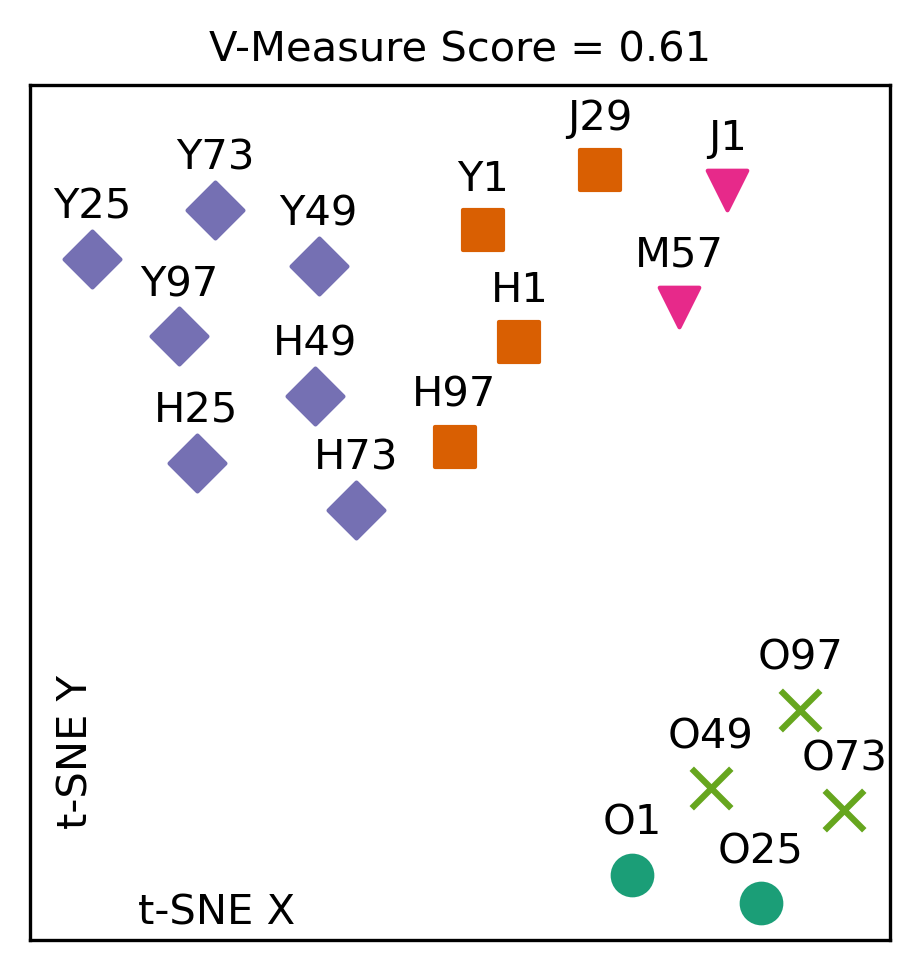

In [38]:
# Show best
labels_pred_show = labels_pred[np.argmin(scores)]
gpt_label = labels_pred_show[-1]
labels_pred_show_copy = labels_pred_show.copy()
labels_pred_show[labels_pred_show_copy == gpt_label] = 4
labels_pred_show[labels_pred_show_copy == 4] = gpt_label

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=9)  # Perplexity adjusted for small dataset
X_tsne = tsne.fit_transform(X)

# Plot t-SNE visualization with KMeans labels
plt.figure(dpi=300, figsize=(3.7, 3.7))
shapes = ['o', 's', 'D', 'v', 'x', "p", "P"]
for i, label in enumerate(labels_pred_show):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1], c=[plt.cm.Dark2(label)],
                s=90, marker=shapes[label])
    plt.text(X_tsne[i, 0], X_tsne[i, 1] + 4,
             list(books.keys())[i][6:].split("_")[0].replace("F", "M").replace("G", "O").replace("B", "J"),
             ha="center", va="bottom", fontsize=10)

ax = plt.gca()
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.set_xlim(x_min - 0.03 * (x_max - x_min), x_max + 0.01 * (x_max - x_min))
ax.set_ylim(y_min, y_max + 0.06 * (y_max - y_min))
plt.text(x_min + 0.1 * (x_max - x_min), y_min + 0.02 * (y_max - y_min), "t-SNE X", fontsize=10)
plt.text(x_min + 0.05 * (x_max - x_min), y_min + 0.15 * (y_max - y_min), "t-SNE Y", fontsize=10,
         rotation=90, ha="right")
plt.xticks([])
plt.yticks([])

plt.title(f"V-Measure Score = {min(scores):.2f}", fontsize=10)
plt.savefig(f"results/figs/kmeans_pos_all.pdf", bbox_inches="tight", pad_inches=0.02)